In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
import yfinance


In [2]:
yfinance.pdr_override()
company = "RELIANCE.NS"
start = "2013-1-1"
end = "2022-1-1"
df = web.get_data_yahoo(company,start=start,end=end)


[*********************100%***********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,2361.550049,2378.000000,2348.100098,2370.250000,2363.135254,1853948
2021-12-28,2375.600098,2404.850098,2373.050049,2398.399902,2391.200684,2941883
2021-12-29,2391.000000,2419.000000,2382.100098,2402.500000,2395.288330,7118779
2021-12-30,2400.000000,2404.949951,2345.600098,2359.100098,2352.018799,13537254
2021-12-31,2373.000000,2383.899902,2360.000000,2368.149902,2361.041504,4373768


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))

In [5]:
df['Close'].describe()

count    2220.000000
mean      986.808473
std       629.601374
min       380.171356
25%       472.991501
50%       714.527008
75%      1327.305939
max      2731.850098
Name: Close, dtype: float64

In [6]:
df['Close'].shape

(2220,)

In [7]:
reshape_close = df['Close'].values.reshape(-1,1)

In [8]:
print(reshape_close)

[[ 416.40292358]
 [ 419.99386597]
 [ 426.33377075]
 ...
 [2402.5       ]
 [2359.10009766]
 [2368.14990234]]


In [9]:
scaled_data = scaler.fit_transform(reshape_close)

In [10]:
scaled_data

array([[0.01540668],
       [0.01693365],
       [0.01962956],
       ...,
       [0.85995107],
       [0.84149621],
       [0.84534444]])

In [11]:
prediction_days = 60
x_train = []
y_train = []
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [15]:
print(x_train,y_train)
# print(x_train[0:2])

[array([0.01540668, 0.01693365, 0.01962956, 0.01986125, 0.0187555 ,
       0.01750233, 0.0179341 , 0.01737596, 0.01523819, 0.01684941,
       0.01676516, 0.01975593, 0.02579012, 0.02793843, 0.03209812,
       0.03211918, 0.03275104, 0.03117141, 0.03046584, 0.02738029,
       0.02428422, 0.02776994, 0.02508455, 0.0266326 , 0.02509509,
       0.02257822, 0.02276777, 0.02218857, 0.02021929, 0.02124079,
       0.02272565, 0.02347334, 0.01863966, 0.01648084, 0.01683888,
       0.01702844, 0.02258874, 0.01930311, 0.0200192 , 0.01828161,
       0.01178405, 0.01342687, 0.00975159, 0.00902496, 0.00948832,
       0.01238432, 0.01425881, 0.01452208, 0.01763922, 0.01620702,
       0.01691259, 0.01631233, 0.01948213, 0.016028  , 0.01405873,
       0.01209998, 0.01161556, 0.00948832, 0.00906709, 0.00878275]), array([0.01693365, 0.01962956, 0.01986125, 0.0187555 , 0.01750233,
       0.0179341 , 0.01737596, 0.01523819, 0.01684941, 0.01676516,
       0.01975593, 0.02579012, 0.02793843, 0.03209812, 0.03

In [16]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [17]:
x_train.shape

(2160, 60)

In [18]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [19]:
x_train

array([[[0.01540668],
        [0.01693365],
        [0.01962956],
        ...,
        [0.00948832],
        [0.00906709],
        [0.00878275]],

       [[0.01693365],
        [0.01962956],
        [0.01986125],
        ...,
        [0.00906709],
        [0.00878275],
        [0.00332775]],

       [[0.01962956],
        [0.01986125],
        [0.0187555 ],
        ...,
        [0.00878275],
        [0.00332775],
        [0.0011268 ]],

       ...,

       [[0.9114887 ],
        [0.92528733],
        [0.94784571],
        ...,
        [0.84732181],
        [0.84623746],
        [0.85820759]],

       [[0.92528733],
        [0.94784571],
        [0.92686076],
        ...,
        [0.84623746],
        [0.85820759],
        [0.85995107]],

       [[0.94784571],
        [0.92686076],
        [0.93219729],
        ...,
        [0.85820759],
        [0.85995107],
        [0.84149621]]])

In [20]:
model = Sequential()

In [21]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=25,batch_size=32)


Epoch 1/25
68/68 [==============================] - 21s 112ms/step - loss: 0.0143
Epoch 2/25
68/68 [==============================] - 7s 107ms/step - loss: 0.0023
Epoch 3/25
68/68 [==============================] - 7s 103ms/step - loss: 0.0024
Epoch 4/25
68/68 [==============================] - 7s 102ms/step - loss: 0.0022
Epoch 5/25
68/68 [==============================] - 7s 105ms/step - loss: 0.0019
Epoch 6/25
68/68 [==============================] - 7s 103ms/step - loss: 0.0018
Epoch 7/25
68/68 [==============================] - 7s 101ms/step - loss: 0.0017
Epoch 8/25
68/68 [==============================] - 8s 112ms/step - loss: 0.0017
Epoch 9/25
68/68 [==============================] - 8s 112ms/step - loss: 0.0017
Epoch 10/25
68/68 [==============================] - 8s 120ms/step - loss: 0.0015
Epoch 11/25
68/68 [==============================] - 8s 117ms/step - loss: 0.0016
Epoch 12/25
68/68 [==============================] - 9s 126ms/step - loss: 0.0016
Epoch 13/25
68/68 [=====

In [25]:
test_start = "2022-2-1"
test_end = "2023-1-1"
test_df = web.get_data_yahoo(company,start=test_start,end=test_end)
actual_prices = test_df['Close'].values
total_dataset = pd.concat((df['Close'],test_df['Close']),axis=0)


[*********************100%***********************]  1 of 1 completed


In [26]:
total_dataset.head()

Date
2013-01-01    416.402924
2013-01-02    419.993866
2013-01-03    426.333771
2013-01-04    426.878632
2013-01-07    424.278259
Name: Close, dtype: float64

In [31]:
model_inputs = total_dataset[len(total_dataset) - len(test_df) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [32]:
model_inputs[:10]

array([[0.92686076],
       [0.93219729],
       [0.97423113],
       [0.96632185],
       [0.97276412],
       [0.98430902],
       [0.98662649],
       [0.98968822],
       [1.        ],
       [0.98662649]])

In [34]:
x_test = []
for i in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[i-prediction_days:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [35]:
x_test.shape

(228, 60, 1)

In [36]:
predictd_prices = model.predict(x_test)
predictd_prices = scaler.inverse_transform(predictd_prices)

8/8 [==============================] - 2s 30ms/step


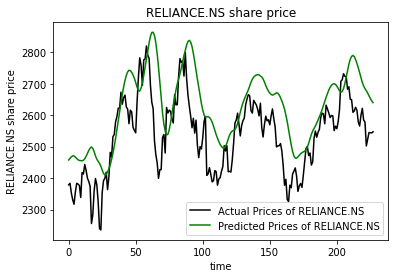

In [37]:
plt.plot(actual_prices,color='black',label = f"Actual Prices of {company}")
plt.plot(predictd_prices,color='green',label = f"Predicted Prices of {company}")
plt.title(f"{company} share price")
plt.xlabel("time")
plt.ylabel(f"{company} share price")
plt.legend()
plt.show()

In [39]:
plt.savefig(f"{company} Predicted share price.jpg")

<Figure size 432x288 with 0 Axes>